# Simple Image Classification Model Using Logistic Regression

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score

from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

X = fashion_mnist.data  
y = fashion_mnist.target  


y = y.astype(int)


print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features shape: (70000, 784)
Labels shape: (70000,)


In [ ]:
X = fashion_mnist.data  
y = fashion_mnist.target  

fashion_mnist_df = pd.DataFrame(X) 
fashion_mnist_df['label'] = y.astype(int) 


   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  label
0       0       0       0       0  ...         0         0         0      9
1       0       0       0       0  ...         0         0         0      0
2       0       0       0       0  ...         0         0         0      0
3       0       0       0       0  ...         0         0         0      3
4       0       0       0       0  ...         0         0         0      0

[5 rows x 785 columns]
DataFrame shape: (70000, 785)


In [8]:
fashion_mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_mnist_df.shape

(70000, 785)

In [11]:
fashion_mnist_df= fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)
fashion_mnist_df.shape

(21000, 785)

In [15]:
LOOKUP={
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneakers',
    8:'Bag',
    9:'Ankle boot'}

In [16]:
def display_image(features, actual_label):
    print("Actual Label : ",LOOKUP[actual_label])

    plt.imshow(features.reshape(28,28))

In [17]:
X= fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y= fashion_mnist_df["label"]

In [18]:
X.head()

,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,70,133,126,131,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,152,251,229,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,141,114,117,114,124,118,108,135,88,0,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,212,245,237,254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,43,196,97,55,50,86,200,57,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,33,196,255,244,255,...,0,6,0,140,255,242,255,1,0,0,0,0,0,0,0,190,194,191,0,0,3,0,0,0,0,0,0,0,0,2,0,35,167,161,140,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,123,211,154,226,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,157,255,225,...,255,47,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,184,196,194,214,212,181,158,48,0,0,0,0,0,0,0,0,0,0,3


In [19]:
Y.head()

0    4
1    9
2    5
3    4
4    3
Name: label, dtype: int64

Actual Label :  T-shirt


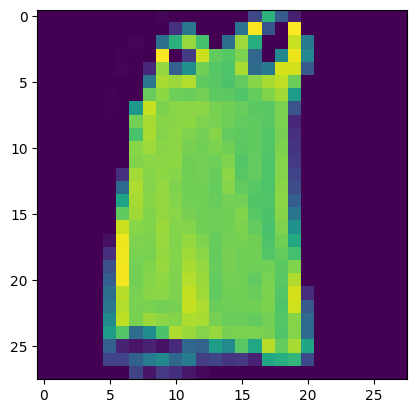

In [20]:
display_image(X.loc[5].values,Y.loc[5])

Actual Label :  Bag


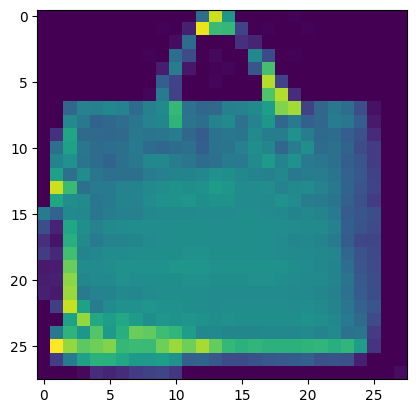

In [22]:
display_image(X.loc[57].values,Y.loc[57])

In [23]:
X=X/255
X.head()

,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.274510,0.521569,0.494118,0.513725,0.509804,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.007843,0.000000,0.596078,0.984314,0.898039,...,0.0,0.000000,0.003922,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.309804,0.552941,0.447059,0.458824,0.447059,0.486275,0.462745,0.423529,0.529412,0.345098,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.015686
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.035294
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.007843,0.0,0.00000,0.831373,0.960784,0.929412,0.996078,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.019608
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168627,0.768627,0.380392,0.215686,0.196078,0.337255,0.784314,0.223529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.129412,0.768627,1.000000,0.956863,1.000000,...,0.0,0.023529,0.000000,0.549020,1.0,0.94902,1.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.745098,0.760784,0.74902,0.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.0,0.137255,0.654902,0.631373,0.54902,0.0,0.0,0.0,0.0,0.015686
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.482353,0.827451,0.603922,0.886275,0.321569,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.345098,0.615686,1.000000,0.882353,...,1.0,0.184314,0.000000,0.007843,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.117647,0.721569,0.768627,0.760784,0.839216,0.831373,0.709804,0.619608,0.188235,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.011765


In [24]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [26]:
def summerize_classification(y_test,y_pred,avg_method='weighted'):
    acc= accuracy_score(y_test,y_pred,normalize=True)
    num_acc= accuracy_score(y_test,y_pred,normalize=False)

    prec= precision_score(y_test,y_pred,average=avg_method)
    recall= recall_score(y_test,y_pred,average=avg_method)

    print("Test Data Count", len(y_test))

    print("Accuracy Count : ", num_acc)
    print("Accuracy Score : ", acc)
    print("Precision Score : ", prec)
    print("Recall :", recall)

In [31]:
logistic_model= LogisticRegression(solver='sag', max_iter=10000).fit(x_test,y_test)

In [32]:
y_pred= logistic_model.predict(x_test)
y_pred

array([3, 1, 9, ..., 5, 5, 7])

In [33]:
summerize_classification(y_test,y_pred)

Test Data Count 4200
Accuracy Count :  4023.0
Accuracy Score :  0.9578571428571429
Precision Score :  0.9576721533218253
Recall : 0.9578571428571429
